## Introduction

My friend who lives up in Queens, NYC came to Seattle to visit me. Despite me telling him that late fall and winter are arguably the worst times to visit, he visited in November. When he arrived, he complained about the amount of rain and how it was too, much even compared to NYC.

The purpose of this project is to hopefully prove to my friend that Seattle is not as rainy as popularly believed, and that it is comparable to NYC, perhaps even raining less than the Big Apple.

Data: We will use daily precipitation measured in Seattle and New York from January 1, 2020 through December 31, 2023. The data sets were downloaded from the National Centers for Environmental Information Online search tool: https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND. The data sets seattle_rain.csv and ny_rain.csv can be accessed from the weather folderLinks in the DATA 3320 Github repository: https://github.com/galenegan/DATA-3320/tree/main/weather. You can also consult the data documentation: https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import matplotlib.dates as mdates

## Loading and checking clean data

In [ ]:
clean_data = pd.read_csv('https://raw.githubusercontent.com/SlimNaka/Seattle-Weather/main/clean_seattle_nyc_weather.csv')

In [ ]:
clean_data

,date,city,precipitation
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


##### $\rightarrow$ Review the contents of the data set.

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   city           2922 non-null   object 
 2   precipitation  2922 non-null   float64
dtypes: float64(1), object(2)
memory usage: 68.6+ KB


In [ ]:
clean_data["date"] = pd.to_datetime(clean_data["date"]) #puts "date" back into a date format.
clean_data.describe()

,date,precipitation
count,2922,2922.000000
mean,2021-12-31 00:00:00,0.124740
min,2020-01-01 00:00:00,0.000000
25%,2020-12-31 00:00:00,0.000000
50%,2021-12-31 00:00:00,0.013333
75%,2022-12-31 00:00:00,0.126859
max,2023-12-31 00:00:00,4.244615
std,NaN,0.273386


In [ ]:
clean_data.groupby(by='city').describe()

date                                                                 \
     count                 mean                  min                  25%   
city                                                                        
NYC   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   
SEA   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   

                                                                          \
                      50%                  75%                  max  std   
city                                                                       
NYC   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   
SEA   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   

     precipitation                                                              
             count      mean  min  25%       50%       75%       max       std  
city                                                                            
NYC         1461.0  0.133579  0.0  0.0  0.011538  0.122000  4.244615  0.308664  
SEA         1461.0  0.115901  0.0  0.0  0.016000  0.131429  2.710000  0.232597

###We have loaded and checked the data. Upon checking, we noticed that the dates were "object" type, so we converted it back into the date format.

## Questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, we will answer the following specific questions about the data.


##### $\rightarrow$ Specific Questions.

* About how many days does it rain in each city? (Or how many days does it NOT rain in each city?)
* In which city does it rain harder?
* What's the overall total inches of rainfall per city?

## Analysis

### 5 Number Summary: Revisted

In [ ]:
clean_data.groupby(by='city').describe()

date                                                                 \
     count                 mean                  min                  25%   
city                                                                        
NYC   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   
SEA   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   

                                                                          \
                      50%                  75%                  max  std   
city                                                                       
NYC   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   
SEA   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   

     precipitation                                                              
             count      mean  min  25%       50%       75%       max       std  
city                                                                            
NYC         1461.0  0.133579  0.0  0.0  0.011538  0.122000  4.244615  0.308664  
SEA         1461.0  0.115901  0.0  0.0  0.016000  0.131429  2.710000  0.232597

The 5 number summary shows that the mean for NYC (\~0.134 in.) is about 0.018 inches more than Seattle (\~0.116 in.), so on average, NYC received more inches of rainfall than Seattle during that timeframe. However, we also found that Seattle's median (\~0.016 in.) and 75th percentile (\~0.131 in) of rainfall are higher NYC’s (\~0.012 in. and ~0.122 in. respectively), which tells us that perhaps it rains harder here than it does in NYC.

###Graph of both cities

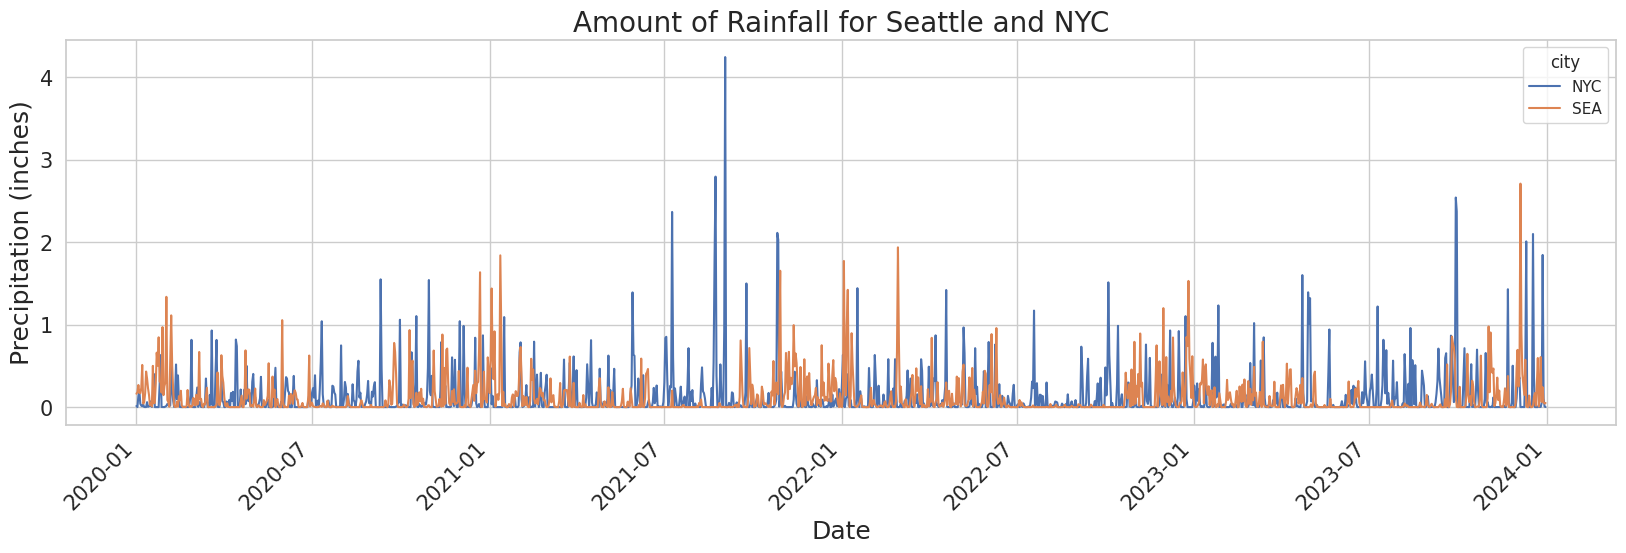

In [ ]:
fig = plt.figure(figsize=(20,5))

sns.lineplot(data=clean_data, x='date', y='precipitation', hue='city')

plt.title('Amount of Rainfall for Seattle and NYC', fontsize=20)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15);

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) ## Auto-set ticks
plt.xticks(rotation=45, ha='right') ##Adjust angle and horizontal align right
plt.show()

####Here, we can see that NYC has more total inches of rainfall. For the most part, both cities hover around 0.5 to 1 inch(es), but we can clearly see NYC has more peaks above 2 inches, as well as fairly consistent rain during Seattle's dry season.

###Checking frequency of no rain, between 0.01 and 0.25 inches, greater than 0.5 inches, and greater than 1 inch

In [ ]:
nyc_zero = ((clean_data["city"] == "NYC") & (clean_data["precipitation"] == 0)).sum()
nyc_zero_percent = "%.2f" % (100*nyc_zero/1461)
print(f"NYC had about {nyc_zero} days without rain in four years.")
print(f"That's roughly {nyc_zero_percent}% of the time.")

NYC had about 454 days without rain in four years.
That's roughly 31.07% of the time.


In [ ]:
sea_zero = ((clean_data["city"] == "SEA") & (clean_data["precipitation"] == 0)).sum()
sea_zero_percent = "%.2f" % (100*sea_zero/1461)
print(f"SEA had about {sea_zero} days without rain in four years.")
print(f"That's roughly {sea_zero_percent}% of the time.")

SEA had about 548 days without rain in four years.
That's roughly 37.51% of the time.


In [ ]:
nyc_hfin = ((clean_data["city"] == "NYC") & (clean_data["precipitation"] > 0.5)).sum()
nyc_hfin_percent = "%.2f" % (100*nyc_hfin/1461)
print(f"NYC had about {nyc_hfin} days exceeding 0.5 inches of rain in four years.")
print(f"That's roughly {nyc_hfin_percent}% of the time.")

NYC had about 114 days exceeding 0.5 inches of rain in four years.
That's roughly 7.80% of the time.


In [ ]:
sea_hfin = ((clean_data["city"] == "SEA") & (clean_data["precipitation"] > 0.5)).sum()
sea_hfin_percent = "%.2f" % (100*sea_hfin/1461)
print(f"SEA had about {sea_hfin} days exceeding 0.5 inches of rain in four years.")
print(f"That's roughly {sea_hfin_percent}% of the time.")

SEA had about 94 days exceeding 0.5 inches of rain in four years.
That's roughly 6.43% of the time.


In [ ]:
nyc_onein = ((clean_data["city"] == "NYC") & (clean_data["precipitation"] > 1)).sum()
nyc_onein_percent = "%.2f" % (100*nyc_onein/1461)
print(f"NYC had about {nyc_onein} days exceeding 1 inch of rain in four years.")
print(f"That's roughly {nyc_onein_percent}% of the time.")

NYC had about 33 days exceeding 1 inch of rain in four years.
That's roughly 2.26% of the time.


In [ ]:
sea_onein = ((clean_data["city"] == "SEA") & (clean_data["precipitation"] > 1)).sum()
sea_onein_percent = "%.2f" % (100*sea_onein/1461)
print(f"SEA had about {sea_onein} days exceeding 1 inch of rain in four years.")
print(f"That's roughly {sea_onein_percent}% of the time.")

SEA had about 14 days exceeding 1 inch of rain in four years.
That's roughly 0.96% of the time.


In [ ]:
nyc_mist = ((clean_data["city"] == "NYC") & (clean_data["precipitation"] >= 0.01) & (clean_data["precipitation"] <= 0.25)).sum()
nyc_mist_percent = "%.2f" % (100*nyc_mist/1461)
print(f"NYC had about {nyc_mist} days with rainfall between 0.01 and 0.25 in four years.")
print(f"That's roughly {nyc_mist_percent}% of the time.")

NYC had about 518 days with rainfall between 0.01 and 0.25 in four years.
That's roughly 35.46% of the time.


In [ ]:
sea_mist = ((clean_data["city"] == "SEA") & (clean_data["precipitation"] >= 0.01) & (clean_data["precipitation"] <= 0.25)).sum()
sea_mist_percent = "%.2f" % (100*sea_mist/1461)
print(f"SEA had about {sea_mist} days with rainfall between 0.01 and 0.25 in four years.")
print(f"That's roughly {sea_mist_percent}% of the time.")

SEA had about 574 days with rainfall between 0.01 and 0.25 in four years.
That's roughly 39.29% of the time.


####Here, we can see that in rains harder in NYC compared to Seattle and has more days of rain in general, but Seattle has more days of light-rain compared to NYC.

###Log Histogram of both cities

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

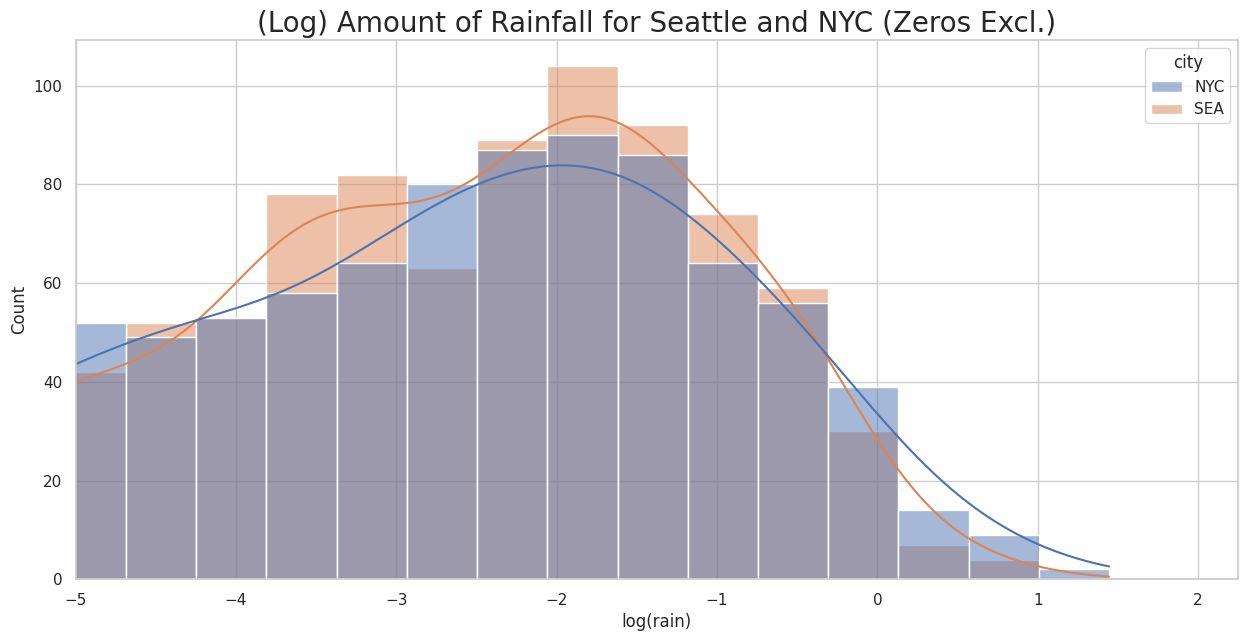

In [ ]:
#Zeros Excluded
clean_data["log_precip"] = np.log(clean_data["precipitation"])
plt.figure(figsize=(15, 7))
h = sns.histplot(data=clean_data, x="log_precip", hue="city", bins="auto", kde=True)
plt.title('(Log) Amount of Rainfall for Seattle and NYC (Zeros Excl.)', fontsize=20)
plt.xlim(-5,2.25)
plt.xlabel("log(rain)")

Text(0.5, 0, 'log(rain)')

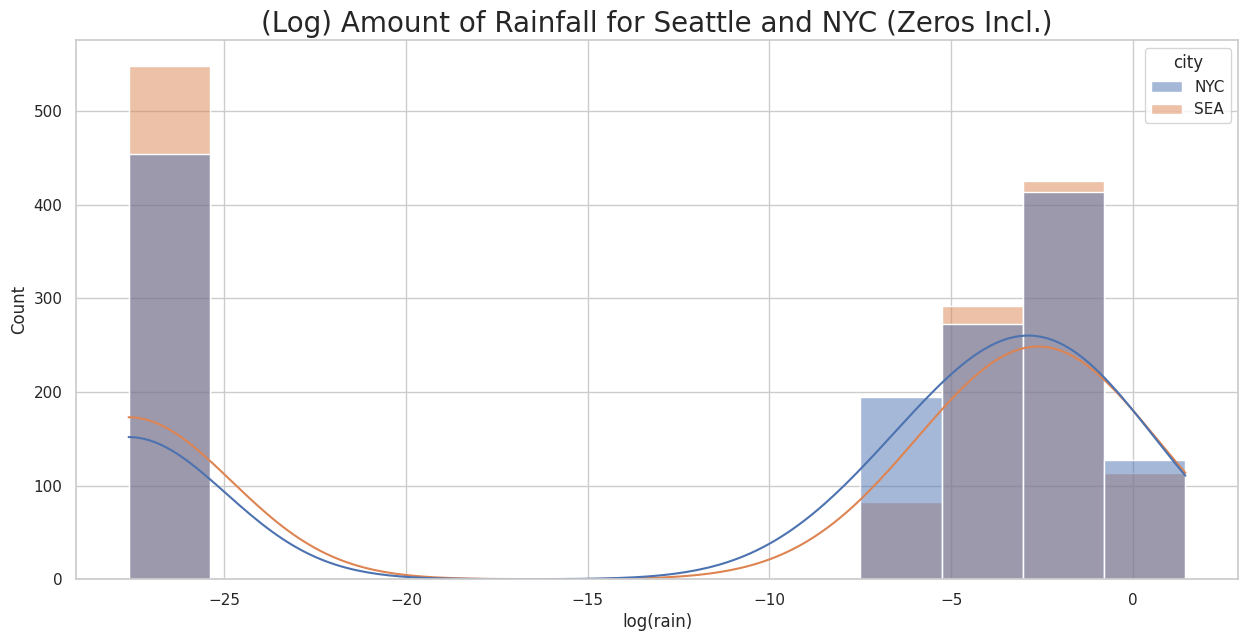

In [ ]:
#Zeros Included
clean_data.loc[clean_data["precipitation"]==0,"precipitation"]=1e-12 #convert all precipitation = zero values into a negligibly small, positive number.
clean_data["log_precip"] = np.log(clean_data["precipitation"])
plt.figure(figsize=(15, 7))
h = sns.histplot(data=clean_data, x="log_precip", hue="city", bins="auto", kde=True)
plt.title('(Log) Amount of Rainfall for Seattle and NYC (Zeros Incl.)', fontsize=20)
plt.xlabel("log(rain)")

####Here, we can see that NYC has more intense rains compared to Seattle by taking the natural log of each precipitation value and counting the frequency, giving us an easy-to-read histogram. The graph above, which ignores zero-values, shows us that while Seattle has more days with rain above zero but below 1 inch, NYC has more days of rain closer to, and especially beyond, 1 inch of rain (recall that ln(1) = 0). The graph on the bottom, which includes zero-values (by converting each zero-value into a negligibly small, positive value), shows us that Seattle has more days of no rain, just as we said above in the numerical analysis.

## Results for communication assignment

The communications assignment utilizes the graphs produced above.

## Conclusion

"Rainy" can be defined in many ways. Here, we are looking at total amount, frequency, and intensity. From the 5 number summary, we can see that the mean for NYC is about 0.018 inches more than Seattle, so on average, NYC received more inches of rainfall than Seattle during this 4-year timeframe.

But we can also see that Seattle's median and 75th percentile of rainfall are higher, which tells us that perhaps it rains harder here than it does in NYC.

With more detailed analysis, we can see that not only does NYC get more total rainfall, but the city also has more days of rain (precipitation greater than zero) in addition to more days of heavier rainfall (precipitation greater than 0.5 inches as well as greater than 1 inch).

So, while Seattle has more misty days than NYC, when it comes to the total number of rainy days per year, intensity of rain, and overall inches of rainfall, NYC is rainier than Seattle.